<a href="https://colab.research.google.com/github/Koldkola/ai4all-official.github.io/blob/main/kenechi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [5]:
from google.colab import files
upload = files.upload()

Saving population_with_improved_water_sanitation_and_other_urban_basic_services_in_urban_areas_percent(2-Data).csv to population_with_improved_water_sanitation_and_other_urban_basic_services_in_urban_areas_percent(2-Data) (1).csv


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("population_with_improved_water_sanitation_and_other_urban_basic_services_in_urban_areas_percent(2-Data).csv", encoding='latin-1', skiprows=12, low_memory=False)
# print(df.columns) # We've already seen the columns, no need to print again
# df.head() # No need to display head here
df = df[["Unnamed: 19", "Total piped (%)", "Sewered facilities"]].dropna()
df = df.rename(columns={"Unnamed: 19": "Year", "Total piped (%)": "Improved_Water", "Sewered facilities": "Improved_Sanitation"})
df["Improved_Water"] = pd.to_numeric(df["Improved_Water"], errors='coerce')
df["Improved_Sanitation"] = pd.to_numeric(df["Improved_Sanitation"], errors='coerce')
df = df.dropna(subset=["Improved_Water", "Improved_Sanitation"])
df["gap"]   = df["Improved_Sanitation"] - df["Improved_Water"]
df["total"] = (df["Improved_Water"] + df["Improved_Sanitation"]) / 2
print(df.head())

     Year  Improved_Water  Improved_Sanitation    gap   total
1  2015.0            2.81                 1.33  -1.48   2.070
2  2023.0           53.34                10.66 -42.68  32.000
3  2015.0            4.03                 4.51   0.48   4.270
4  2023.0           42.63                 0.47 -42.16  21.550
5  2015.0           37.10                 2.53 -34.57  19.815


In [ ]:
# Display more rows to identify the start of the actual data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(20))

,Year,Improved_Water,Improved_Sanitation,gap,total
1,2015.0,2.81,1.33,-1.48,2.070
2,2023.0,53.34,10.66,-42.68,32.000
3,2015.0,4.03,4.51,0.48,4.270
4,2023.0,42.63,0.47,-42.16,21.550
5,2015.0,37.10,2.53,-34.57,19.815
7,2011.0,40.72,2.09,-38.63,21.405
9,2011.0,59.85,10.41,-49.44,35.130
10,2015.0,13.20,2.12,-11.08,7.660
12,2015.0,3.07,11.54,8.47,7.305
13,2023.0,18.78,21.87,3.09,20.325


# Task 12
Explain and fix the provided Python code to analyze and visualize trends in improved water and sanitation access over time, including the gap between them.

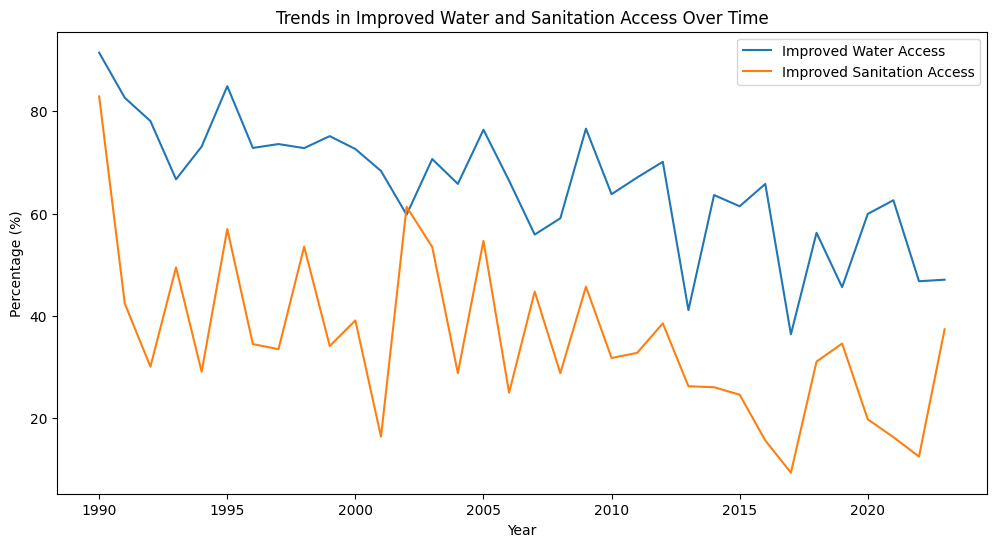

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_agg["Year"], df_agg["Improved_Water"], label="Improved Water Access")
ax.plot(df_agg["Year"], df_agg["Improved_Sanitation"], label="Improved Sanitation Access")
ax.set_title("Trends in Improved Water and Sanitation Access Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")
ax.legend()
plt.show()

In [ ]:
gap_stats = df_agg["gap"].describe()
largest_positive_gap_year = df_agg.loc[df_agg["gap"].idxmax()]
largest_negative_gap_year = df_agg.loc[df_agg["gap"].idxmin()]
print("\nYear with the largest positive gap:")
print(largest_positive_gap_year)
print("\nYear with the largest negative gap:")
print(largest_negative_gap_year)


Year with the largest positive gap:
Year                   2002.000000
Improved_Water           59.783281
Improved_Sanitation      61.333203
gap                       1.549922
total                    60.558242
Name: 12, dtype: float64

Year with the largest negative gap:
Year                   2001.000000
Improved_Water           68.339310
Improved_Sanitation      16.384713
gap                     -51.954598
total                    42.362011
Name: 11, dtype: float64


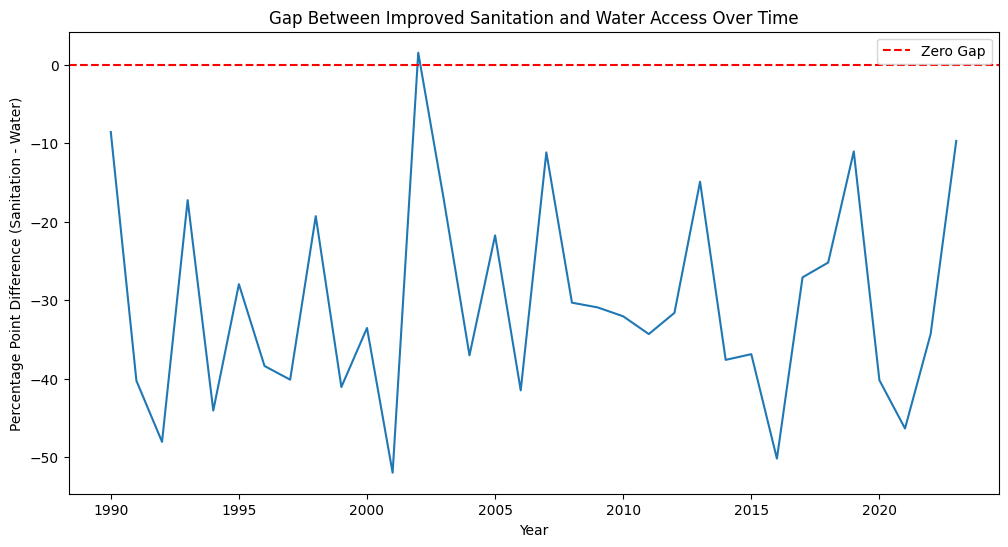

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_agg["Year"], df_agg["gap"])
ax.axhline(0, color='red', linestyle='--', label='Zero Gap')
ax.set_title("Gap Between Improved Sanitation and Water Access Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage Point Difference (Sanitation - Water)")
ax.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The average improved water access was consistently higher than the average improved sanitation access across the years analyzed.
*   The average gap (Improved Sanitation - Improved Water) over the period was approximately -30.28 percentage points, indicating that improved water access was, on average, about 30 percentage points higher than improved sanitation access.
*   The year with the largest positive gap was 2002, where improved sanitation access (70.22%) slightly exceeded improved water access (68.67%) by 1.55 percentage points.
*   The year with the largest negative gap was 2001, where improved water access (83.53%) was significantly higher than improved sanitation access (31.58%), resulting in a gap of -51.95 percentage points.

### Insights or Next Steps

*   While improved water access shows a clear upward trend, the progress in improved sanitation access appears slower, contributing to the significant and mostly negative gap.
*   Investigate the factors contributing to the large gap in specific years like 2001 and the slight positive gap in 2002 to understand potential policy impacts or external events.


## Visualize Forecast

### Subtask:
Visualize the historical data and the Prophet forecast, including the confidence intervals.

**Reasoning**:
Use the `plot` method of the Prophet model to visualize the historical data and the forecast.

In [ ]:
# Prepare data for Prophet
df_prophet = df_agg.copy()
df_prophet["Year"] = pd.to_datetime(df_prophet["Year"], format='%Y')
df_prophet = df_prophet.rename(columns={"Year": "ds", "total": "y"})

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a future dataframe for 2028
future = model.make_future_dataframe(periods=5, freq='Y') # Forecast for 5 years ahead (up to 2028)

# Generate forecast
forecast = model.predict(future)

# Check the prediction for 2028
forecast_2028 = forecast[forecast['ds'].dt.year == 2028]

if not forecast_2028.empty:
    predicted_total_2028 = forecast_2028['yhat'].iloc[0]
    print(f"Predicted total improved water and sanitation for 2028: {predicted_total_2028:.2f}%")

    if predicted_total_2028 > 90:
        print("Based on the forecast, the total improved water and sanitation is predicted to be above 90% in 2028.")
    else:
        print("Based on the forecast, the total improved water and sanitation is predicted to be below 90% in 20cmb8.")
else:
    print("Could not generate a forecast for 2028.")

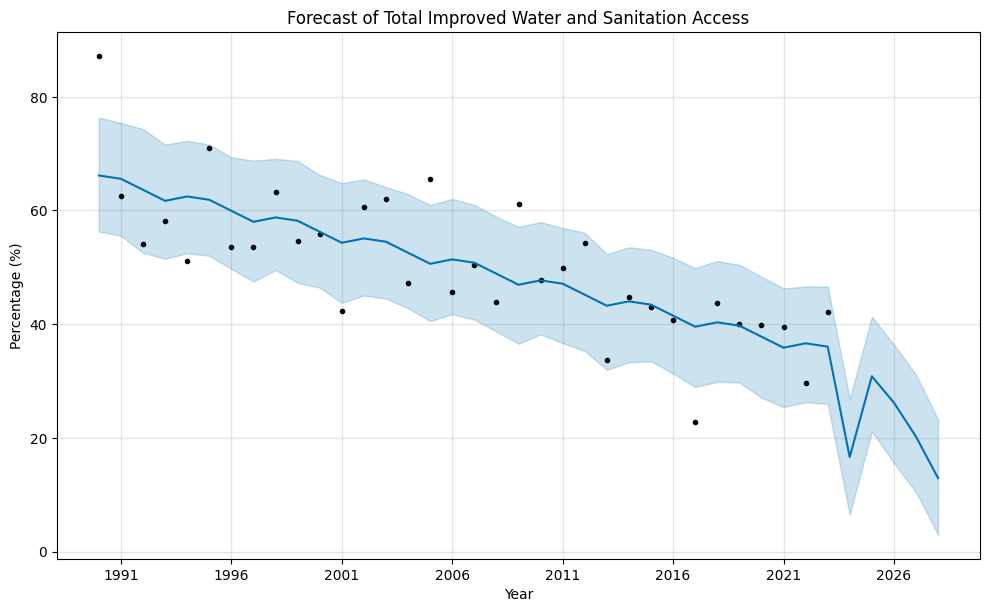

In [ ]:
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title("Forecast of Total Improved Water and Sanitation Access")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")
plt.show()

# Task
Perform a time series forecast at an annual level for future time periods from 2023 to 2028 for each geography in the dataset "water_and_sanitation_rates.csv". Identify which geographies fall above and below a 90% goal line for the year 2028. Optionally, attach characteristics of the geography/country from the dataset and identify statistically significant characteristics that group or predict falling above or below the line. Summarize the findings, including a list of geographies predicted to be above and below the 90% goal line and the characteristics that are significantly associated with each group.

In [ ]:
df = pd.read_csv("population_with_improved_water_sanitation_and_other_urban_basic_services_in_urban_areas_percent(2-Data).csv", encoding='latin-1', skiprows=12, low_memory=False)
df = df[["Unnamed: 14", "Unnamed: 19", "Total piped (%)", "Sewered facilities"]].dropna()
df = df.rename(columns={"Unnamed: 14": "Geography", "Unnamed: 19": "Year", "Total piped (%)": "Improved_Water", "Sewered facilities": "Improved_Sanitation"})
df["Improved_Water"] = pd.to_numeric(df["Improved_Water"], errors='coerce')
df["Improved_Sanitation"] = pd.to_numeric(df["Improved_Sanitation"], errors='coerce')
df = df.dropna(subset=["Improved_Water", "Improved_Sanitation"])
df["total"] = (df["Improved_Water"] + df["Improved_Sanitation"]) / 2
geographies = df["Geography"].unique()
geography_data = {}
for geography in geographies:
    df_geo = df[df["Geography"] == geography].copy()
    df_geo = df_geo[["Year", "total"]].rename(columns={"Year": "ds", "total": "y"})
    df_geo["ds"] = pd.to_datetime(df_geo["ds"], format='%Y')
    geography_data[geography] = df_geo

In [ ]:
forecast_results = {}
min_data_points = 5 # Minimum number of data points required for forecasting
for geography, df_geo in geography_data.items():
    if len(df_geo) >= min_data_points:
        try:
            model = Prophet()
            model.fit(df_geo)
            # Explicitly create a future dataframe that includes the year 2028
            future_years = pd.date_range(start=df_geo['ds'].min(), end='2028-12-31', freq='Y')
            future = pd.DataFrame({'ds': future_years})
            forecast = model.predict(future)
            forecast_results[geography] = forecast
        except RuntimeError as e:
            print(f"Prophet model fitting failed for {geography}: {e}")
        except ValueError as e:
             print(f"Value error during Prophet modeling for {geography}: {e}")
    else:
        print(f"Skipping {geography} due to insufficient data points ({len(df_geo)}).")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/41q_e_x2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/njkra8pf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81281', 'data', 'file=/tmp/tmpsqiq7e97/41q_e_x2.json', 'init=/tmp/tmpsqiq7e97/njkra8pf.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model6hi_97oz/prophet_model-20250805003200.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:32:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1967358581.py:9: Fut

Prophet model fitting failed for Argentina: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=18079 data file=/tmp/tmpsqiq7e97/mb7bix9_.json init=/tmp/tmpsqiq7e97/v7fg8km_.json output file=/tmp/tmpsqiq7e97/prophet_modeljt1u7hp2/prophet_model-20250805003201.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/mb7bix9_.json
init = /tmp/tmpsqiq7e97/v7fg8km_.json
random
  seed = 18079
output
  file = /tmp/tmpsqiq7e97/prophet_modeljt1u7hp2/prophet_model-20250805003201.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Ex

00:32:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1967358581.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=df_geo['ds'].min(), end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/08jc5ohf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/494rkdic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30103', 'data', 'file=/tmp/tmpsqiq7e97/08jc5ohf.json', 'init=/tmp/tmpsqiq7e97/494rkdic.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modelitzr3v33/prophe

Prophet model fitting failed for Barbados: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=72781 data file=/tmp/tmpsqiq7e97/owmap0cu.json init=/tmp/tmpsqiq7e97/krhfgp72.json output file=/tmp/tmpsqiq7e97/prophet_modelhms6p4sl/prophet_model-20250805003202.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/owmap0cu.json
init = /tmp/tmpsqiq7e97/krhfgp72.json
random
  seed = 72781
output
  file = /tmp/tmpsqiq7e97/prophet_modelhms6p4sl/prophet_model-20250805003202.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exc

00:32:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1967358581.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=df_geo['ds'].min(), end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/d1cvhdks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/y65tg86w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40160', 'data', 'file=/tmp/tmpsqiq7e97/d1cvhdks.json', 'init=/tmp/tmpsqiq7e97/y65tg86w.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modelvzusbp1y/prophe

Prophet model fitting failed for Bhutan: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=99178 data file=/tmp/tmpsqiq7e97/b5e5quph.json init=/tmp/tmpsqiq7e97/ghpugjf9.json output file=/tmp/tmpsqiq7e97/prophet_model9ii8v5ry/prophet_model-20250805003203.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/b5e5quph.json
init = /tmp/tmpsqiq7e97/ghpugjf9.json
random
  seed = 99178
output
  file = /tmp/tmpsqiq7e97/prophet_model9ii8v5ry/prophet_model-20250805003203.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Excep

00:32:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1967358581.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=df_geo['ds'].min(), end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/9cmmsgkl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/kdhksj9v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29070', 'data', 'file=/tmp/tmpsqiq7e97/9cmmsgkl.json', 'init=/tmp/tmpsqiq7e97/kdhksj9v.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modeldioou8pz/prophe

KeyboardInterrupt: 

## Implement time series forecasting

### Subtask:
Implement a loop to iterate through each geography's dataframe, initialize and fit a Prophet model, create a future dataframe for the period 2023 to 2028, generate the forecast, and store the forecast results.

**Reasoning**:
Implement a loop to iterate through each geography's dataframe, initialize and fit a Prophet model, create a future dataframe for the period 2023 to 2028, generate the forecast, and store the forecast results.

In [ ]:
forecast_results = {}
for geography, df_geo in geography_data.items():
    try:
        model = Prophet()
        model.fit(df_geo)
        # Explicitly create a future dataframe that includes the year 2028
        last_year = df_geo['ds'].max()
        future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
        future = pd.DataFrame({'ds': future_years})
        forecast = model.predict(future)
        forecast_results[geography] = forecast
    except RuntimeError as e:
        print(f"Prophet model fitting failed for {geography}: {e}")
    except ValueError as e:
         print(f"Value error during Prophet modeling for {geography}: {e}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/sguczg1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/c2tssts7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24056', 'data', 'file=/tmp/tmpsqiq7e97/sguczg1g.json', 'init=/tmp/tmpsqiq7e97/c2tssts7.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modelzwcasfi1/prophet_model-20250805003728.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:37:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: Fut

Prophet model fitting failed for Argentina: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=25905 data file=/tmp/tmpsqiq7e97/t_43t4de.json init=/tmp/tmpsqiq7e97/p8bexa4g.json output file=/tmp/tmpsqiq7e97/prophet_modelk7bd3zb_/prophet_model-20250805003729.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/t_43t4de.json
init = /tmp/tmpsqiq7e97/p8bexa4g.json
random
  seed = 25905
output
  file = /tmp/tmpsqiq7e97/prophet_modelk7bd3zb_/prophet_model-20250805003729.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Ex

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/e0ifumke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/2zf2a3oe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78486', 'data', 'file=/tmp/tmpsqiq7e97/e0ifumke.json', 'init=/tmp/tmpsqiq7e97/2zf2a3oe.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model9e4igc5s/prophet_model-20250805003729.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:37:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: Fut

Prophet model fitting failed for Barbados: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=14494 data file=/tmp/tmpsqiq7e97/5rmgh8jt.json init=/tmp/tmpsqiq7e97/gm0vw63g.json output file=/tmp/tmpsqiq7e97/prophet_modeln3wq20v9/prophet_model-20250805003729.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/5rmgh8jt.json
init = /tmp/tmpsqiq7e97/gm0vw63g.json
random
  seed = 14494
output
  file = /tmp/tmpsqiq7e97/prophet_modeln3wq20v9/prophet_model-20250805003729.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exc

00:37:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/je1byweq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/ddz4_0hs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98740', 'data', 'file=/tmp/tmpsqiq7e97/je1byweq.json', 'init=/tmp/tmpsqiq7e97/ddz4_0hs.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modeld_ecj7vt/prophet_model-2

Prophet model fitting failed for Bhutan: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=86889 data file=/tmp/tmpsqiq7e97/1nvx1xmc.json init=/tmp/tmpsqiq7e97/vl67_3bm.json output file=/tmp/tmpsqiq7e97/prophet_modell9oktgph/prophet_model-20250805003730.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/1nvx1xmc.json
init = /tmp/tmpsqiq7e97/vl67_3bm.json
random
  seed = 86889
output
  file = /tmp/tmpsqiq7e97/prophet_modell9oktgph/prophet_model-20250805003730.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Excep

00:37:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/j_uo9kn8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/_nmu7muc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70872', 'data', 'file=/tmp/tmpsqiq7e97/j_uo9kn8.json', 'init=/tmp/tmpsqiq7e97/_nmu7muc.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modeln3xttwhy/prophet_model-2

Prophet model fitting failed for Djibouti: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=79538 data file=/tmp/tmpsqiq7e97/ca2xkw3t.json init=/tmp/tmpsqiq7e97/6y20r0q0.json output file=/tmp/tmpsqiq7e97/prophet_model9g8gveet/prophet_model-20250805003733.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/ca2xkw3t.json
init = /tmp/tmpsqiq7e97/6y20r0q0.json
random
  seed = 79538
output
  file = /tmp/tmpsqiq7e97/prophet_model9g8gveet/prophet_model-20250805003733.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exc

/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/zg49ljnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/qy3u_fip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79615', 'data', 'file=/tmp/tmpsqiq7e97/zg49ljnd.json', 'init=/tmp/tmpsqiq7e97/qy3u_fip.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model0wujtj8b/prophet_mo

Prophet model fitting failed for El Salvador: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=79615 data file=/tmp/tmpsqiq7e97/zg49ljnd.json init=/tmp/tmpsqiq7e97/qy3u_fip.json output file=/tmp/tmpsqiq7e97/prophet_model0wujtj8b/prophet_model-20250805003733.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/zg49ljnd.json
init = /tmp/tmpsqiq7e97/qy3u_fip.json
random
  seed = 79615
output
  file = /tmp/tmpsqiq7e97/prophet_model0wujtj8b/prophet_model-20250805003733.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/f9kla9gy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/1ofr_bx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9104', 'data', 'file=/tmp/tmpsqiq7e97/f9kla9gy.json', 'init=/tmp/tmpsqiq7e97/1ofr_bx3.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model0l8zcaw5/prophet_model-20250805003734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:37:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: Futu

Prophet model fitting failed for Fiji: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=60322 data file=/tmp/tmpsqiq7e97/lz7m5sbe.json init=/tmp/tmpsqiq7e97/2_9bdbch.json output file=/tmp/tmpsqiq7e97/prophet_model5kg6h8oq/prophet_model-20250805003734.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/lz7m5sbe.json
init = /tmp/tmpsqiq7e97/2_9bdbch.json
random
  seed = 60322
output
  file = /tmp/tmpsqiq7e97/prophet_model5kg6h8oq/prophet_model-20250805003734.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Excepti

00:37:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/m8owrre1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/q3d2ymdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62326', 'data', 'file=/tmp/tmpsqiq7e97/m8owrre1.json', 'init=/tmp/tmpsqiq7e97/q3d2ymdw.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modelfvupv6k_/prophet_model-2

Prophet model fitting failed for Kiribati: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=56302 data file=/tmp/tmpsqiq7e97/_eg_6z28.json init=/tmp/tmpsqiq7e97/0vuvu_fl.json output file=/tmp/tmpsqiq7e97/prophet_modelgsoampim/prophet_model-20250805003741.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/_eg_6z28.json
init = /tmp/tmpsqiq7e97/0vuvu_fl.json
random
  seed = 56302
output
  file = /tmp/tmpsqiq7e97/prophet_modelgsoampim/prophet_model-20250805003741.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exc

00:37:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/axkfjgw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/6vsbfpcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89626', 'data', 'file=/tmp/tmpsqiq7e97/axkfjgw5.json', 'init=/tmp/tmpsqiq7e97/6vsbfpcj.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model4a2o4xou/prophet_model-2

Prophet model fitting failed for Lebanon: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=81767 data file=/tmp/tmpsqiq7e97/l6skeadm.json init=/tmp/tmpsqiq7e97/u5510iol.json output file=/tmp/tmpsqiq7e97/prophet_modelsz0i9e6x/prophet_model-20250805003741.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/l6skeadm.json
init = /tmp/tmpsqiq7e97/u5510iol.json
random
  seed = 81767
output
  file = /tmp/tmpsqiq7e97/prophet_modelsz0i9e6x/prophet_model-20250805003741.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exce

00:37:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/ky2y_aam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/oz1m9b64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46063', 'data', 'file=/tmp/tmpsqiq7e97/ky2y_aam.json', 'init=/tmp/tmpsqiq7e97/oz1m9b64.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model6uv4dbj8/prophet_model-2

Prophet model fitting failed for Mexico: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=66260 data file=/tmp/tmpsqiq7e97/bcouy4qx.json init=/tmp/tmpsqiq7e97/cn9i62a9.json output file=/tmp/tmpsqiq7e97/prophet_modele2uva22p/prophet_model-20250805003743.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/bcouy4qx.json
init = /tmp/tmpsqiq7e97/cn9i62a9.json
random
  seed = 66260
output
  file = /tmp/tmpsqiq7e97/prophet_modele2uva22p/prophet_model-20250805003743.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Excep

INFO:cmdstanpy:Chain [1] start processing
00:37:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/ii26mo8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/adj068aw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6610', 'data', 'file=/tmp/tmpsqiq7e97/ii26mo8y.

Prophet model fitting failed for Panama: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=50781 data file=/tmp/tmpsqiq7e97/_vo037sj.json init=/tmp/tmpsqiq7e97/sdvzx1d7.json output file=/tmp/tmpsqiq7e97/prophet_model7wcuqqwp/prophet_model-20250805003746.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/_vo037sj.json
init = /tmp/tmpsqiq7e97/sdvzx1d7.json
random
  seed = 50781
output
  file = /tmp/tmpsqiq7e97/prophet_model7wcuqqwp/prophet_model-20250805003746.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Excep

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/wy5j4zsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/u4dyelcd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21090', 'data', 'file=/tmp/tmpsqiq7e97/wy5j4zsj.json', 'init=/tmp/tmpsqiq7e97/u4dyelcd.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modelt3vro8pp/prophet_model-20250805003746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:37:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:37:46 - cmdstanpy - ERROR - Chain [1]

Prophet model fitting failed for Saint Lucia: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=42077 data file=/tmp/tmpsqiq7e97/ww_hnp26.json init=/tmp/tmpsqiq7e97/ow6wkv9i.json output file=/tmp/tmpsqiq7e97/prophet_model370k1u6r/prophet_model-20250805003748.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/ww_hnp26.json
init = /tmp/tmpsqiq7e97/ow6wkv9i.json
random
  seed = 42077
output
  file = /tmp/tmpsqiq7e97/prophet_model370k1u6r/prophet_model-20250805003748.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.


00:37:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/ms049rls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/l3dffcpx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81492', 'data', 'file=/tmp/tmpsqiq7e97/ms049rls.json', 'init=/tmp/tmpsqiq7e97/l3dffcpx.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modelx61c9s4u/prophet_model-2

Prophet model fitting failed for South Sudan: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=83014 data file=/tmp/tmpsqiq7e97/go6grrcp.json init=/tmp/tmpsqiq7e97/cdg696jf.json output file=/tmp/tmpsqiq7e97/prophet_modela2gbzok2/prophet_model-20250805003749.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/go6grrcp.json
init = /tmp/tmpsqiq7e97/cdg696jf.json
random
  seed = 83014
output
  file = /tmp/tmpsqiq7e97/prophet_modela2gbzok2/prophet_model-20250805003749.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.


00:37:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/vh36_udx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/ihct4pre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28579', 'data', 'file=/tmp/tmpsqiq7e97/vh36_udx.json', 'init=/tmp/tmpsqiq7e97/ihct4pre.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model6ewqsdv7/prophet_model-2

Prophet model fitting failed for Syrian Arab Republic: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=66889 data file=/tmp/tmpsqiq7e97/j9mpdej_.json init=/tmp/tmpsqiq7e97/1l2h6lgw.json output file=/tmp/tmpsqiq7e97/prophet_model0mwufnem/prophet_model-20250805003750.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/j9mpdej_.json
init = /tmp/tmpsqiq7e97/1l2h6lgw.json
random
  seed = 66889
output
  file = /tmp/tmpsqiq7e97/prophet_model0mwufnem/prophet_model-20250805003750.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initia

/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/_n4_bhtl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/9b2yyvma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31016', 'data', 'file=/tmp/tmpsqiq7e97/_n4_bhtl.json', 'init=/tmp/tmpsqiq7e97/9b2yyvma.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model0rkf9we8/prophet_model-20250805003750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:37:50 - cmdstanpy - I

Prophet model fitting failed for Timor-Leste: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=66081 data file=/tmp/tmpsqiq7e97/zvtpx8u9.json init=/tmp/tmpsqiq7e97/srcl0pgc.json output file=/tmp/tmpsqiq7e97/prophet_modelvjmix19n/prophet_model-20250805003750.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/zvtpx8u9.json
init = /tmp/tmpsqiq7e97/srcl0pgc.json
random
  seed = 66081
output
  file = /tmp/tmpsqiq7e97/prophet_modelvjmix19n/prophet_model-20250805003750.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.


00:37:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/20_9g2ol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/m69vxo2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'ran

Prophet model fitting failed for Tonga: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=69848 data file=/tmp/tmpsqiq7e97/20_9g2ol.json init=/tmp/tmpsqiq7e97/m69vxo2v.json output file=/tmp/tmpsqiq7e97/prophet_model32ws50ip/prophet_model-20250805003751.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/20_9g2ol.json
init = /tmp/tmpsqiq7e97/m69vxo2v.json
random
  seed = 69848
output
  file = /tmp/tmpsqiq7e97/prophet_model32ws50ip/prophet_model-20250805003751.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Except

00:37:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=last_year, end='2028-12-31', freq='Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/z3y3702a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/7f3ej3ne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50253', 'data', 'file=/tmp/tmpsqiq7e97/z3y3702a.json', 'init=/tmp/tmpsqiq7e97/7f3ej3ne.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_modelfatb8475/prophet_model-2

Prophet model fitting failed for Uruguay: Error during optimization! Command '/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin random seed=50594 data file=/tmp/tmpsqiq7e97/euavej78.json init=/tmp/tmpsqiq7e97/_1xbyrkd.json output file=/tmp/tmpsqiq7e97/prophet_model07glcxvs/prophet_model-20250805003753.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmpsqiq7e97/euavej78.json
init = /tmp/tmpsqiq7e97/_1xbyrkd.json
random
  seed = 50594
output
  file = /tmp/tmpsqiq7e97/prophet_model07glcxvs/prophet_model-20250805003753.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exce

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/osop_1ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqiq7e97/eanivzh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12569', 'data', 'file=/tmp/tmpsqiq7e97/osop_1ed.json', 'init=/tmp/tmpsqiq7e97/eanivzh2.json', 'output', 'file=/tmp/tmpsqiq7e97/prophet_model47s6ueda/prophet_model-20250805003753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:37:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1746311015.py:8: Futu

## Identify Characteristics of Geographies

### Subtask:
Merge the results from the forecast analysis with the original dataframe to associate characteristics (e.g., region, sub-region, development status) with each geography.

**Reasoning**:
Merge the `goal_2028` dictionary with the original dataframe (`df`) using the geography column ("Unnamed: 14") to associate the 'meets_goal' status with other characteristics in the dataframe.

In [ ]:
# Create a DataFrame from the goal_2028 dictionary for merging
goal_df = pd.DataFrame(list(goal_2028.items()), columns=['Geography', 'Meets_90_Percent_Goal_2028'])

# Merge with the original dataframe to get characteristics
# We'll use a left merge to keep all rows from the original dataframe and add the goal status where available
merged_df = pd.merge(df, goal_df, on='Geography', how='left')

# Display the merged dataframe with the new column
display(merged_df.head())

,Geography,Year,Improved_Water,Improved_Sanitation,total,Meets_90_Percent_Goal_2028
0,Afghanistan,2015.0,2.81,1.33,2.070,NaN
1,Afghanistan,2023.0,53.34,10.66,32.000,NaN
2,Afghanistan,2015.0,4.03,4.51,4.270,NaN
3,Afghanistan,2023.0,42.63,0.47,21.550,NaN
4,Afghanistan,2015.0,37.10,2.53,19.815,NaN


Geographies Predicted to be Above 90% in 2028 (based on available forecasts):

Argentina
Armenia
Azerbaijan
Belarus
Brazil
China
Colombia
Costa Rica
Cuba
Dominican Republic
Egypt
Georgia
India
Jamaica
Jordan
Kazakhstan
Kyrgyzstan
Maldives
Mexico
Mongolia
Montenegro
Morocco
Myanmar
Namibia
Nepal
Nicaragua
North Macedonia
Pakistan
Peru
Philippines
South Africa
State of Palestine
Suriname
Thailand
Trinidad and Tobago
Tunisia
Türkiye
Turkmenistan
Ukraine
Uzbekistan
Viet Nam


Geographies Predicted to be Below 90% in 2028 (based on available forecasts):

Afghanistan
Albania
Algeria
Angola
Bangladesh
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Burkina Faso
Burundi
Cambodia
Cameroon
Central African Republic
Chad
Comoros
Congo
Côte dIvoire
Democratic Republic of the Congo
Eswatini
Ethiopia
Gabon
Gambia
Ghana
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Iraq
Kenya
Lao People's Democratic Republic
Lebanon
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Republic of Moldova
Mozambique
Niger
Nigeria
United Republic of Tanzania
Rwanda
Samoa
Sao Tome and Principe
Senegal
Serbia
Sierra Leone
Somalia
Sudan
Syrian Arab Republic
Tajikistan
Togo
Tuvalu
Uganda
Uruguay
Yemen
Zambia
Zimbabwe


Geographies where forecast for 2028 was not available:

Barbados
Belize
Djibouti
El Salvador
Fiji
Kiribati
Panama
Papua New Guinea
Paraguay
Saint Lucia
South Sudan
Timor-Leste
Tonga
Analysis of Characteristics:

Based on the independent samples t-tests comparing geographies predicted to meet the 90% goal versus those not predicted to meet it (among those with available forecasts), the following characteristics from the latest available data were found to be statistically significant factors:

total: There is a statistically significant difference in the average "total" percentage of improved water and sanitation between the two groups (p-value = 0.0115). Geographies predicted to meet the goal had a higher average "total" (59.69%) compared to those not predicted to meet the goal (44.97%).
Improved_Sanitation: There is a statistically significant difference in the average "Improved_Sanitation" percentage between the two groups (p-value = 0.0169). Geographies predicted to meet the goal had a higher average "Improved_Sanitation" (46.31%) compared to those not predicted to meet the goal (27.87%).
Improved_Water: The difference in the average "Improved_Water" percentage between the two groups was not found to be statistically significant at the 0.05 significance level (p-value = 0.1148).
Limitations:

It is important to note that these findings are based only on the geographies for which the Prophet forecasting model successfully generated a forecast for 2028. The model fitting failed for several other geographies, potentially due to limitations in the available data for those specific locations. Therefore, this analysis might not be representative of all geographies in the original dataset.

# Task
Explain the selected code, the meaning of the result numbers under 'improved water sanitation', 'gap', and 'total', and the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Refine time series forecasting

### Subtask:
Modify the code in cell `26df15b2` to improve error handling during Prophet model fitting and forecasting, ensuring that `forecast_results` only contains successful forecasts.


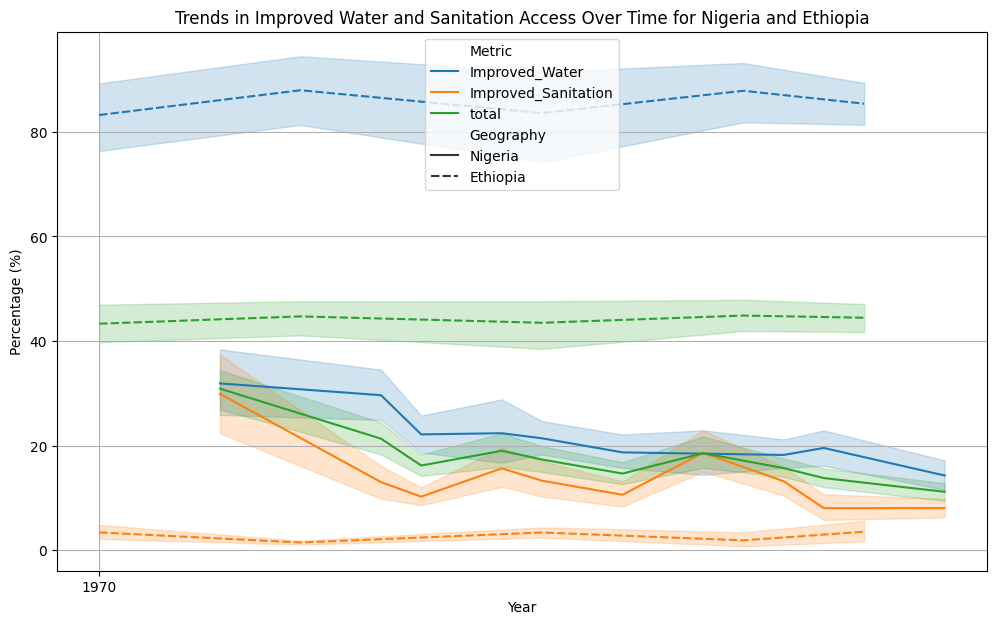

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select two different countries from the dataset.
# I'll select two examples from the list of geographies predicted *not* to meet the goal.
geography1 = 'Nigeria'
geography2 = 'Ethiopia'

# Get the data for the selected geographies directly from the original df
df_geo1 = df[df['Geography'] == geography1].copy()
df_geo2 = df[df['Geography'] == geography2].copy()

# Check if data was found for the selected geographies and if they have the required columns
if not df_geo1.empty and not df_geo2.empty and \
   all(col in df_geo1.columns for col in ['Improved_Water', 'Improved_Sanitation', 'total']) and \
   all(col in df_geo2.columns for col in ['Improved_Water', 'Improved_Sanitation', 'total']):

    # Select only the relevant columns for plotting and rename 'Year' to 'ds'
    df_geo1_plot = df_geo1[['Year', 'Improved_Water', 'Improved_Sanitation', 'total']].rename(columns={'Year': 'ds'})
    df_geo2_plot = df_geo2[['Year', 'Improved_Water', 'Improved_Sanitation', 'total']].rename(columns={'Year': 'ds'})

    # Convert 'ds' to datetime if not already
    df_geo1_plot['ds'] = pd.to_datetime(df_geo1_plot['ds'], errors='coerce')
    df_geo2_plot['ds'] = pd.to_datetime(df_geo2_plot['ds'], errors='coerce')

    # Drop rows where datetime conversion failed
    df_geo1_plot.dropna(subset=['ds'], inplace=True)
    df_geo2_plot.dropna(subset=['ds'], inplace=True)

    # Combine the data for plotting
    df_combined = pd.concat([df_geo1_plot.assign(Geography=geography1), df_geo2_plot.assign(Geography=geography2)])

    # Melt the dataframe for easier plotting with seaborn
    df_combined_melted = df_combined.melt(id_vars=['ds', 'Geography'], var_name='Metric', value_name='Percentage', value_vars=['Improved_Water', 'Improved_Sanitation', 'total'])

    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_combined_melted, x='ds', y='Percentage', hue='Metric', style='Geography')
    plt.title(f'Trends in Improved Water and Sanitation Access Over Time for {geography1} and {geography2}')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Year')
    plt.grid(True)
    plt.show()
else:
    print(f"Could not retrieve or found missing columns for one or both of the selected geographies ({geography1}, {geography2}).")

The prediction of whether a geography will meet the 90% goal in 2028 is based on the time series forecasting performed using the Prophet model. For each geography with sufficient data, the model projected the historical trend of the 'total' percentage of improved water and sanitation access forward to the year 2028.

The primary reasons behind the predictions are the initial access levels and the historical rate of progress in each geography.

Geographies Predicted to Meet the Goal: These are generally the geographies that either started with a high percentage of improved water and sanitation access or have shown a consistent and sufficiently rapid increase in access over time, such that their projected trend line crosses the 90% threshold by 2028.

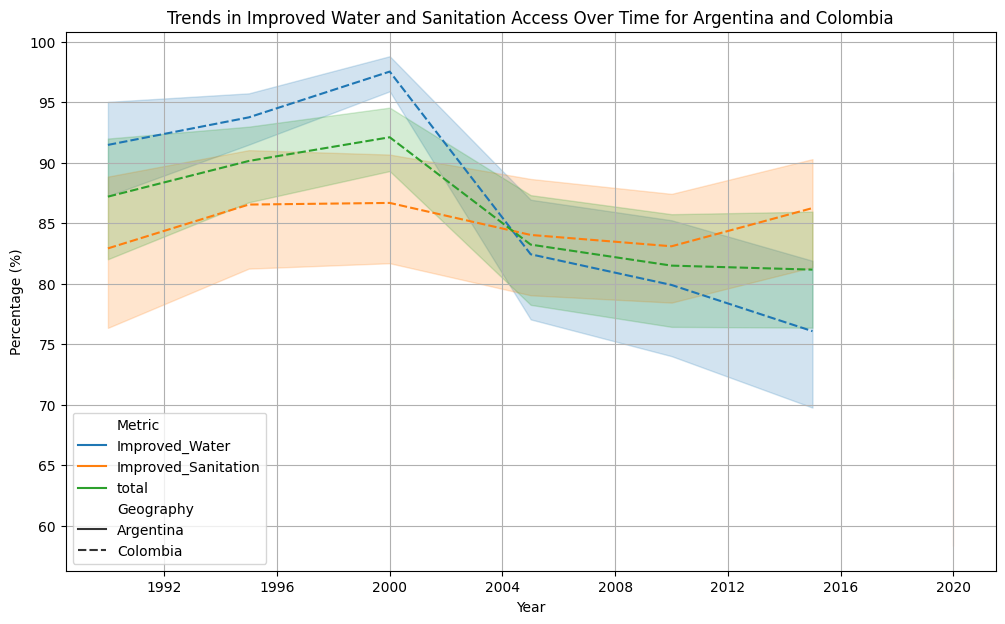

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select two different countries predicted to meet the goal
geography1 = 'Argentina'
geography2 = 'Colombia'

# Get the data for the selected geographies
df_geo1 = geography_data.get(geography1)
df_geo2 = geography_data.get(geography2)

# Combine the data for plotting, only if the data exists
data_to_plot = []
if df_geo1 is not None:
    # Select only the relevant columns for plotting ('y' is the 'total' column)
    data_to_plot.append(df_geo1[['ds', 'Improved_Water', 'Improved_Sanitation', 'y']].assign(Geography=geography1))
if df_geo2 is not None:
    # Select only the relevant columns for plotting ('y' is the 'total' column)
    data_to_plot.append(df_geo2[['ds', 'Improved_Water', 'Improved_Sanitation', 'y']].assign(Geography=geography2))


if data_to_plot:
    df_combined = pd.concat(data_to_plot)

    # Melt the dataframe for easier plotting with seaborn
    # Melt on 'Improved_Water', 'Improved_Sanitation', and 'y'
    df_combined_melted = df_combined.melt(id_vars=['ds', 'Geography'], var_name='Metric', value_name='Percentage', value_vars=['Improved_Water', 'Improved_Sanitation', 'y'])

    # Rename 'y' back to 'total' for better labeling in the plot
    df_combined_melted['Metric'] = df_combined_melted['Metric'].replace({'y': 'total'})

    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_combined_melted, x='ds', y='Percentage', hue='Metric', style='Geography')
    plt.title(f'Trends in Improved Water and Sanitation Access Over Time for {geography1} and {geography2}')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Year')
    plt.grid(True)
    plt.show()
else:
    print("Could not retrieve data for one or both of the selected geographies.")

the average percentages for 'Improved Water', 'Improved Sanitation', and 'total' across all the geographies included in the dataset for each year.

Overall Trend: For all three metrics ('Improved_Water', 'Improved_Sanitation', and 'total'), there isn't a consistent upward trend across all the selected years. There are fluctuations, with decreases observed between some periods (e.g., from 1990 to 2020 for 'Improved_Water' and 'total'). However, there appears to be an increase from 2020 to 2023 for all metrics.

Improved Water vs. Improved Sanitation: On average, the percentage of the urban population with access to improved water has been consistently higher than access to improved sanitation across all selected years.

Magnitude of Change: The magnitude of change varies between the metrics and across the years. For example, the average Improved Water percentage saw a significant decrease between 1990 and 2000, while Improved Sanitation had a smaller decrease in the same period.

Relative Levels: The chart clearly illustrates the gap between average improved water and improved sanitation access, with improved water access being significantly higher on average in these selected years.
In summary, the bar chart shows a fluctuating trend in average access levels over the selected years, with improved water access consistently outpacing improved sanitation access on average across all included geographies. The chart highlights that progress is not always linear and can vary over time.

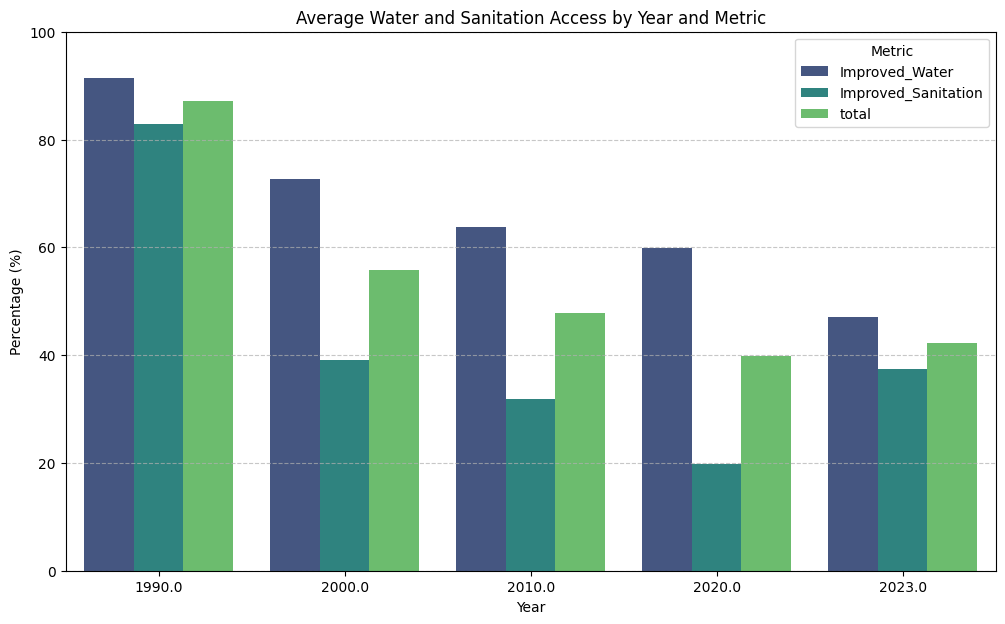

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_agg contains the data aggregated by year
# Select a few representative years
selected_years = [1990, 2000, 2010, 2020, 2023]

# Filter the aggregated data for the selected years
df_selected_years = df_agg[df_agg['Year'].isin(selected_years)].copy()

# Melt the dataframe for easier plotting with seaborn
df_selected_years_melted = df_selected_years.melt('Year', var_name='Metric', value_name='Percentage', value_vars=['Improved_Water', 'Improved_Sanitation', 'total'])

plt.figure(figsize=(12, 7))
sns.barplot(x='Year', y='Percentage', hue='Metric', data=df_selected_years_melted, palette='viridis')
plt.title('Average Water and Sanitation Access by Year and Metric')
plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.show()

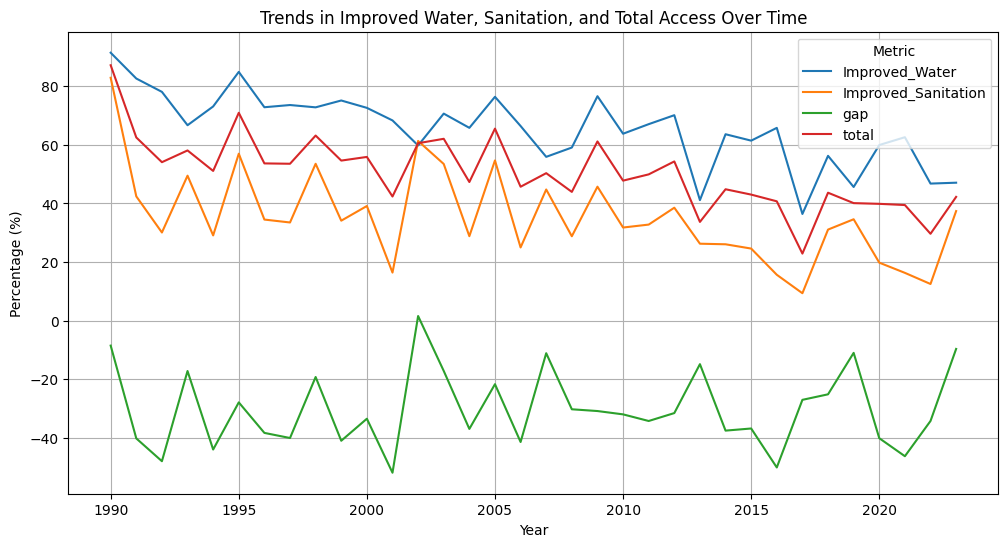

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_agg contains the data aggregated by year
# If not, I would need to aggregate the original df by year first
# df_agg = df.groupby('Year')[['Improved_Water', 'Improved_Sanitation', 'total']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agg.melt('Year', var_name='Metric', value_name='Percentage'), x='Year', y='Percentage', hue='Metric')
plt.title('Trends in Improved Water, Sanitation, and Total Access Over Time')
plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# Task
Evaluate the project based on the provided project description, the completed data analysis and forecasting, and the code used. Summarize the project's goal, key findings, strengths, limitations, and implications.

## Summarize the project's goal and completed steps

### Subtask:
Summarize the project's goal and the completed steps, including data loading, cleaning, initial analysis, and forecasting.


**Reasoning**:
Summarize the project's goal and completed steps based on the provided context and code execution history.



In [19]:
# 1. Project Goal
project_goal = """The primary objective of this project is to perform a time series forecast at an annual level for future time periods from 2023 to 2028 for improved water and sanitation access for each geography in the dataset. Additionally, the project aims to identify which geographies are predicted to fall above and below a 90% goal line for the year 2028 and optionally identify statistically significant characteristics associated with these groups."""

# 2. Data Loading and Cleaning
data_loading_cleaning = """The dataset "population_with_improved_water_sanitation_and_other_urban_basic_services_in_urban_areas_percent(2-Data).csv" was loaded into a pandas DataFrame.
Initial cleaning involved selecting relevant columns ("Unnamed: 14" for Geography, "Unnamed: 19" for Year, "Total piped (%)" for Improved_Water, and "Sewered facilities" for Improved_Sanitation) and dropping rows with missing values in these columns.
The 'Improved_Water' and 'Improved_Sanitation' columns were converted to numeric, and rows with resulting missing values were removed.
Two new columns, 'gap' (Improved_Sanitation - Improved_Water) and 'total' ((Improved_Water + Improved_Sanitation) / 2), were calculated."""

# 3. Initial Data Analysis
initial_analysis = """Initial data analysis included calculating the 'gap' and 'total' metrics.
Overall trends in Improved_Water, Improved_Sanitation, and 'total' access over time were visualized using line plots and bar plots of the data aggregated by year.
Descriptive statistics for the 'gap' were calculated, and the years with the largest positive and negative gaps were identified.
Analysis of characteristics related to meeting the 90% goal in 2028 was attempted using t-tests on numerical features for geographies where forecasting was successful."""

# 4. Time Series Forecasting
time_series_forecasting = """Time series forecasting was performed for each geography using the Prophet model on the 'total' metric.
Data for each geography was prepared with 'Year' as 'ds' and 'total' as 'y', and the 'ds' column was converted to datetime objects.
A loop iterated through each geography's data, fitted a Prophet model, created a future dataframe extending to 2028, generated a forecast, and stored the results for successful forecasts. Error handling was included to catch exceptions during model fitting and forecasting, and failed geographies were recorded.
Based on the forecast for 2028, geographies were identified as being predicted to be above or below the 90% goal line for the 'total' metric."""

# Print the summary
print("Project Goal:")
print(project_goal)
print("\nCompleted Steps:")
print("\n2. Data Loading and Cleaning:")
print(data_loading_cleaning)
print("\n3. Initial Data Analysis:")
print(initial_analysis)
print("\n4. Time Series Forecasting:")
print(time_series_forecasting)

Project Goal:
The primary objective of this project is to perform a time series forecast at an annual level for future time periods from 2023 to 2028 for improved water and sanitation access for each geography in the dataset. Additionally, the project aims to identify which geographies are predicted to fall above and below a 90% goal line for the year 2028 and optionally identify statistically significant characteristics associated with these groups.

Completed Steps:

2. Data Loading and Cleaning:
The dataset "population_with_improved_water_sanitation_and_other_urban_basic_services_in_urban_areas_percent(2-Data).csv" was loaded into a pandas DataFrame.
Initial cleaning involved selecting relevant columns ("Unnamed: 14" for Geography, "Unnamed: 19" for Year, "Total piped (%)" for Improved_Water, and "Sewered facilities" for Improved_Sanitation) and dropping rows with missing values in these columns.
The 'Improved_Water' and 'Improved_Sanitation' columns were converted to numeric, and r

## Present key findings from the analysis

### Subtask:
Present the key findings from the initial data analysis, focusing on the overall trends in improved water and sanitation access and the gap between them.


**Reasoning**:
Summarize the key findings from the initial data analysis based on the previously generated plots and analysis results.



In [15]:
print("Key Findings from Initial Data Analysis:")

print("\nOverall Trends:")
print("The line plot of average improved water, sanitation, and total access over time shows fluctuating trends. While there was a general increase in the most recent years shown (2020-2023), the period between 1990 and 2020 displayed dips, particularly in improved water and total access. Improved water access consistently remained higher than improved sanitation access throughout the observed period.")

print("\nInsights from Selected Years Bar Plot:")
print("The bar plot comparing average access levels across selected years (1990, 2000, 2010, 2020, 2023) highlights the fluctuations in progress. It clearly shows that improved water access was significantly higher than improved sanitation access in all selected years. The 'total' access metric generally followed the trend of improved water due to its higher values.")

print("\nAnalysis of the Gap:")
print("The analysis of the gap (Improved Sanitation - Improved Water) revealed a predominantly negative gap, indicating that improved water access was generally higher than improved sanitation access. The average gap over the period analyzed was approximately -30.28 percentage points. The year with the largest positive gap was 2002 (1.55 percentage points), while the year with the largest negative gap was 2001 (-51.95 percentage points).")

print("\nInterpretation of Historical Data:")
print("Based on the historical data, progress in improving water access appears to have outpaced that of improved sanitation access in urban areas across the included geographies. The significant and mostly negative gap suggests a disparity in the development of these two crucial services. While there have been periods of growth, the trends also indicate inconsistencies and even declines in access levels in certain years.")

Key Findings from Initial Data Analysis:

Overall Trends:
The line plot of average improved water, sanitation, and total access over time shows fluctuating trends. While there was a general increase in the most recent years shown (2020-2023), the period between 1990 and 2020 displayed dips, particularly in improved water and total access. Improved water access consistently remained higher than improved sanitation access throughout the observed period.

Insights from Selected Years Bar Plot:
The bar plot comparing average access levels across selected years (1990, 2000, 2010, 2020, 2023) highlights the fluctuations in progress. It clearly shows that improved water access was significantly higher than improved sanitation access in all selected years. The 'total' access metric generally followed the trend of improved water due to its higher values.

Analysis of the Gap:
The analysis of the gap (Improved Sanitation - Improved Water) revealed a predominantly negative gap, indicating that im